In [2]:
!pip install mlxtend

# Data Preparation
- Load necessary packages
- Load the data and prepare it for further analysis

In [1]:
# Import 'pandas' for working with data frames
import pandas as pd

# Import 'matplotlib.pyplot' and 'seaborn' for working with data frames
import matplotlib.pyplot as plt
import seaborn as sns

# Import 'apriori' and 'association_rules' from 'mlxtend'
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data and take a look at it
# Note: The data needs to be in binary matrix format
df1 = pd.read_csv('supermarket_binarymat.csv')
df1.head()

,transID,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,...,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Check the data types of various features
df1.dtypes

transID             int64
abrasive cleaner    int64
artif. sweetener    int64
baby cosmetics      int64
baby food           int64
                    ...  
white bread         int64
white wine          int64
whole milk          int64
yogurt              int64
zwieback            int64
Length: 170, dtype: object

In [5]:
# Drop the transaction ID as it will not be useful in this analysis
df1.drop('transID', inplace = True, axis = 1)

# EDA
It is almost always useful to examine the most frequent items in the data set. Here the top 25 most frequent items are plotted with their frequencies.

In [6]:
# Obtain the purchase counts of each of the items or features, sort them, and print the top 25 most selling items
S = df1.sum(axis = 0)
Top = S.sort_values(ascending = False)[:25]
print(Top)

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
bottled water            1087
root vegetables          1072
tropical fruit           1032
shopping bags             969
sausage                   924
pastry                    875
citrus fruit              814
bottled beer              792
newspapers                785
canned beer               764
pip fruit                 744
fruit/vegetable juice     711
whipped/sour cream        705
brown bread               638
domestic eggs             624
frankfurter               580
margarine                 576
coffee                    571
pork                      567
butter                    545
dtype: int64


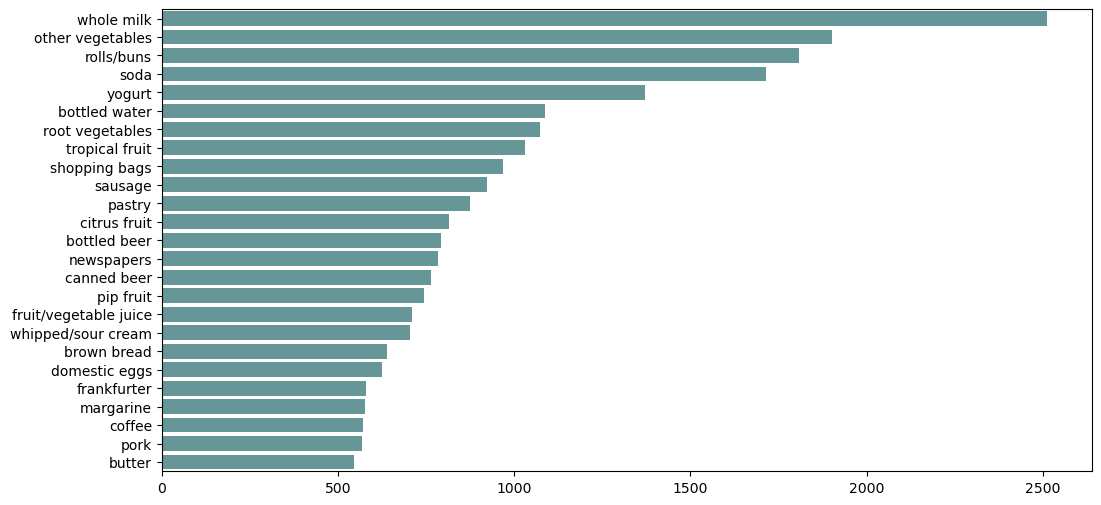

In [7]:
# Visualize the purchase counts of the 25 top most selling items
plt.figure(figsize = (12, 6))
sns.barplot(x = Top.values, y = Top.index, color = 'cadetblue');

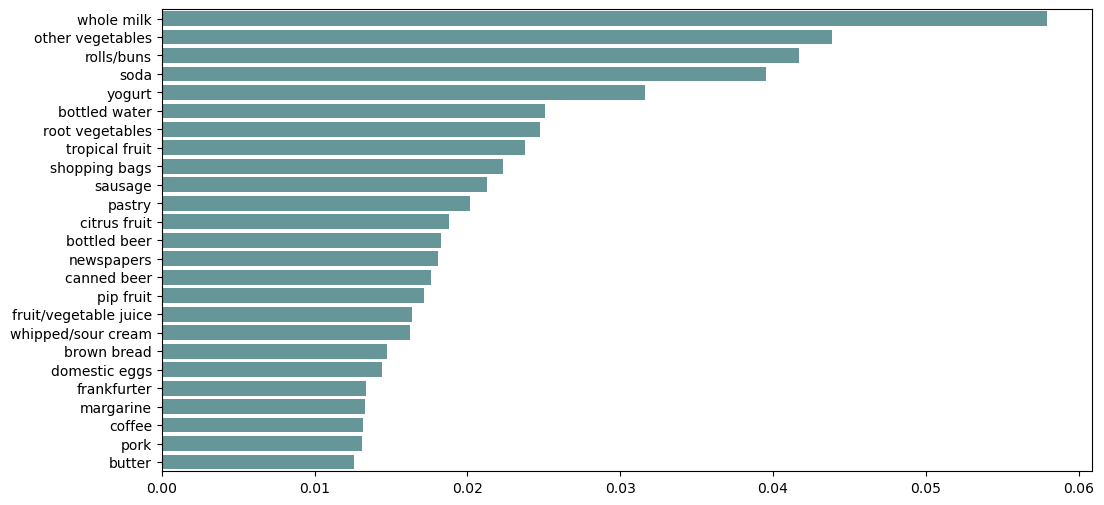

In [8]:
# Visualize the purchase counts of the 25 top most selling items as a fraction of the total purchase count
TopD = Top/sum(S)
plt.figure(figsize = (12, 6))
sns.barplot(x = TopD.values, y = TopD.index, color = 'cadetblue');

In [9]:
# Convert the data into the Boolean data type
# Note: Converting data types to Boolean is not absolutely essential but it is computationally faster
df2 = df1.copy(deep = True)
df2 = df2.astype(bool)
df2.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
# Check the data types of various features
df2.dtypes

abrasive cleaner    bool
artif. sweetener    bool
baby cosmetics      bool
baby food           bool
bags                bool
                    ... 
white bread         bool
white wine          bool
whole milk          bool
yogurt              bool
zwieback            bool
Length: 169, dtype: object

# Building Association Rules

You will need a call to two functions:
- The first will identify *frequent itemsets*, in other words, sets that meet a specified support threshold
- The second will build *association rules* that meet a specified lift (alternatively, confidence) threshold

Note that there may be no rules that meet the specified threshold. In this case, the threshold value will need to be reduced. 

In [11]:
# Obtain frequent itemsets for the data using the 'apriori' method
frequent_itemsets = apriori(df2, min_support = 0.01, use_colnames = True)

In [12]:
# Generate associate rules for the frequent itemsets using the 'association_rules' method for the default metric and threshold
# Note: The default metric is 'confidence' and the default threshold is 0.8
rules = association_rules(frequent_itemsets)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [13]:
# Generate associate rules for the frequent itemsets using the 'association_rules' method for 'lift' with threshold 1.5
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095,0.601792
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,0.512224
2,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
3,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,0.753189
4,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315,0.389597


In [14]:
# Look at the basic summary statistics of the rules
# The first column will be the count or number of rules that meet the thresholds
rules.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
antecedent support,382.0,0.111149,0.075307,0.017285,0.052466,0.082766,0.183935,0.255516
consequent support,382.0,0.111149,0.075307,0.017285,0.052466,0.082766,0.183935,0.255516
support,382.0,0.016206,0.008607,0.010066,0.010880,0.013523,0.017870,0.074835
confidence,382.0,0.217285,0.142740,0.039395,0.101944,0.175852,0.325425,0.586207
lift,382.0,2.013291,0.406457,1.503577,1.706663,1.894027,2.239552,3.372304
leverage,382.0,0.007665,0.003541,0.003671,0.005504,0.006866,0.008474,0.026291
conviction,382.0,1.162229,0.157447,1.015502,1.049835,1.105485,1.224891,1.949059
zhangs_metric,382.0,0.548094,0.103669,0.354642,0.471854,0.540250,0.627682,0.830649


# Subsetting Rules Based on Criteria
We can zero in on rules that meet user-specified criteria, such as lift, confidence or support.

In [15]:
rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.55)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
217,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
224,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
240,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
246,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
290,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
357,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627
362,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,0.560625


# Sorting Rules

In [16]:
rules.sort_values(by = ['lift'], inplace = True, ascending = False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
242,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,0.745217
243,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,0.743056
223,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,0.717225
226,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,0.781720
330,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206,0.725409


In [17]:
# Obtain the lengths of the antecedents and consequents, and the rules themselves
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))
rules['maxlen'] = rules['antecedent_len'] + rules['consequent_len']

In [18]:
# Now you can specify an antecedent length, a consequent length, both, or the length of the rule
rules[(rules['maxlen'] >= 2) & (rules['confidence'] > 0.5) & (rules['lift'] > 1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
224,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990,2,1,3
290,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367,2,1,3
277,"(root vegetables, rolls/buns)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935,2,1,3
240,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107,2,1,3
217,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878,2,1,3
357,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627,2,1,3
362,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,0.560625,2,1,3
246,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779,2,1,3
376,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711,2,1,3
342,"(root vegetables, rolls/buns)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804,0.524192,2,1,3


# Targeting antecedents and consequents

This is a very frequently used approach. You may be interested in discovering what other things people who purchase yogurt and whole milk also buy? Or, what is a basket such that when people buy it, they also buy whole milk? Can you think of how this information might be used for product placement or promotions?

In [19]:
rules[rules['antecedents'] == {'whole milk', 'yogurt'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
242,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,0.745217,2,1,3
377,"(yogurt, whole milk)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033,0.668309,2,1,3
370,"(yogurt, whole milk)",(tropical fruit),0.056024,0.104931,0.015150,0.270417,2.577089,0.009271,1.226823,0.648285,2,1,3
364,"(yogurt, whole milk)",(root vegetables),0.056024,0.108998,0.014540,0.259528,2.381025,0.008433,1.203289,0.614436,2,1,3
235,"(yogurt, whole milk)",(citrus fruit),0.056024,0.082766,0.010269,0.183303,2.214725,0.005633,1.123103,0.581028,2,1,3
338,"(yogurt, whole milk)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511,0.543633,2,1,3
350,"(yogurt, whole milk)",(rolls/buns),0.056024,0.183935,0.015557,0.277677,1.509648,0.005252,1.129779,0.357630,2,1,3


In [20]:
rules[(rules['consequents'] == {'whole milk'}) & (rules['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
240,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107,2,1,3
217,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878,2,1,3
357,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627,2,1,3
362,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,0.560625,2,1,3
246,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779,2,1,3
376,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711,2,1,3
342,"(root vegetables, rolls/buns)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804,0.524192,2,1,3
264,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003,0.519843,2,1,3
371,"(yogurt, tropical fruit)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528,0.521384,2,1,3
336,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577,2,1,3


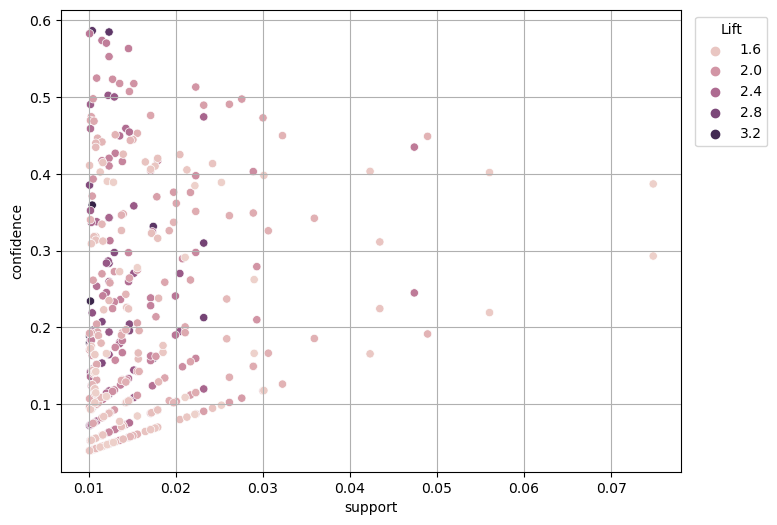

In [21]:
# Visualize the strengths of the rules
plt.figure(figsize = (8, 6))
sns.scatterplot(data = rules, x = 'support', y = 'confidence', hue = 'lift')
plt.legend(bbox_to_anchor = (1.15, 1), title = 'Lift')
plt.grid();